# 공공데이터 과제2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import csv

## 1. 지하철 각 노 선별 최대 하차 인원을 막대그래프로 표시 / 하차인원 출력
- 출근 시간대 : 07:00~08:59
- 사용 파일 : subwaytime.csv 또는 subway.xls
    * 07:00~07:59 하차: index[11]
    * 08:00~08:59 하차: index[13]
- 각 지하철 노선별 가장 많이 내리는 역 분석(1-7호선)
- 하차 인원은 1,000 단위로 콤마
- 7개의 지하철 역을 막대 그래프로 표시

In [20]:
df = pd.read_excel("subway.xls", sheet_name="지하철 시간대별 이용현황", header=[0, 1])
df.head()

사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2023-12                1호선                150                서울역   
1            2023-12                1호선                151                 시청   
2            2023-12                1호선                152                 종각   
3            2023-12                1호선                153               종로3가   
4            2023-12                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               700  35             7,812  8,436            12,190  50,415   
1                73   1             2,208  4,356             3,731  21,903   
2               167   1             4,280  4,932             4,329  25,201   
3               230  16             4,174  2,538             3,621  11,378   
4                40   2             1,862  3,023             3,027  14,468   

   ... 23:00:00~23:59:59 00:00:00~00:59:59        01:00:00~01:59:59         \
   ...                하차                승차     하차                승차     하차   
0  ...            15,733             3,170  4,088               140  1,884   
1  ...             5,965             4,290  1,523             1,053    383   
2  ...             5,317             2,621  1,402             1,638    241   
3  ...             7,655             7,239  2,844               917    422   
4  ...             3,905               627  1,275               104    152   

  02:00:00~02:59:59      03:00:00~03:59:59                    작업일시  
                 승차   하차                승차 하차  Unnamed: 52_level_1  
0                 0  283                 0  0  2024-01-03 09:18:08  
1                 0   10                 0  0  2024-01-03 09:18:08  
2                 1    1                 0  0  2024-01-03 09:18:08  
3                 0    1                 0  0  2024-01-03 09:18:08  
4                 0    0                 0  0  2024-01-03 09:18:08  

[5 rows x 53 columns]

In [ ]:
df.columns

In [ ]:
# 앞부분 사용월~지하철역 0~3
front = df.iloc[:,0:4]
# front.columns.rename = ["사용월", "호선명", "역ID", "지하철역"]
front.columns = ["사용월", "호선명", "역ID", "지하철역"]
front

In [ ]:
# 뒷부분 : 출근 시간대 하차 
back = df.iloc[:,11:14:2]
back.columns = ["07:00:00~07:59:59", "08:00:00~08:59:59"]
back

In [ ]:
subDF = pd.concat([front, back],axis=1)
subDF

In [42]:
# ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']
subDF["호선명"].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '서해선',
       '5호선', '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선',
       '신림선'], dtype=object)

In [77]:
line = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선']

In [78]:
lineMask = subDF["호선명"].isin(line)

In [ ]:
subDF = subDF[lineMask]
subDF

In [ ]:
subDF["07:00:00~07:59:59"] = subDF["07:00:00~07:59:59"].apply(lambda x : x.replace(",", ""))
subDF["08:00:00~08:59:59"] = subDF["08:00:00~08:59:59"].apply(lambda x : x.replace(",", ""))

In [ ]:
# 형변환
subDF["07:00:00~07:59:59"] = subDF["07:00:00~07:59:59"].astype("int")
subDF["08:00:00~08:59:59"] = subDF["08:00:00~08:59:59"].astype("int")
subDF.info()

In [95]:
subDF.loc[:,"내린 사람"] = subDF["07:00:00~07:59:59"]+subDF["08:00:00~08:59:59"]
subDF

C:\Users\kdp\AppData\Local\Temp\ipykernel_10200\2742462202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF.loc[:,"내린 사람"] = subDF["07:00:00~07:59:59"]+subDF["08:00:00~08:59:59"]


,사용월,호선명,역ID,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,내린 사람
0,2023-12,1호선,150,서울역,105313,218007,323320
1,2023-12,1호선,151,시청,63969,182565,246534
2,2023-12,1호선,152,종각,98556,244858,343414
3,2023-12,1호선,153,종로3가,23309,61562,84871
4,2023-12,1호선,154,종로5가,38726,90539,129265
...,...,...,...,...,...,...,...
522,2023-12,7호선,2751,천왕,8685,17145,25830
523,2023-12,7호선,2752,온수(성공회대입구),9250,17305,26555
524,2023-12,7호선,2755,춘의,0,0,0
525,2023-12,7호선,2756,신중동,0,0,0


### 노선별 가장 많이 내리는 지하철 역

In [99]:
max_num_list = []
max_stat_list = []
label_list = []

for i in line:
    nlineDF = subDF[subDF["호선명"] == i]
    max_num = nlineDF["내린 사람"].max()
    station = nlineDF.loc[nlineDF["내린 사람"].idxmax(), "지하철역"]
    
    max_num_list.append(max_num)
    max_stat_list.append(station)
    label_list.append(f"{i} {station}")

    print(f"출근 시간대 {i} 최대 하차역: {station}, 하차인원: {max_num:,}")

출근 시간대 1호선 최대 하차역: 종각, 하차인원: 343,414
출근 시간대 2호선 최대 하차역: 역삼, 하차인원: 448,033
출근 시간대 3호선 최대 하차역: 양재(서초구청), 하차인원: 308,476
출근 시간대 4호선 최대 하차역: 충무로, 하차인원: 221,021
출근 시간대 5호선 최대 하차역: 여의도, 하차인원: 334,282
출근 시간대 6호선 최대 하차역: 공덕, 하차인원: 129,775
출근 시간대 7호선 최대 하차역: 가산디지털단지, 하차인원: 481,268


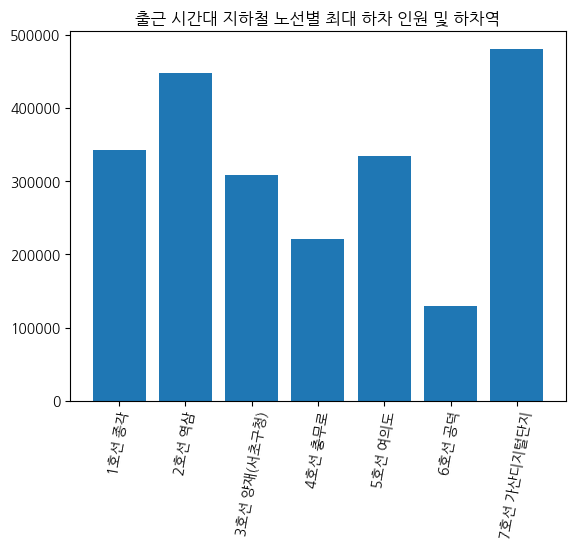

In [100]:
plt.bar(range(7), max_num_list)
plt.xticks(range(7), label_list, rotation = 80)
plt.title("출근 시간대 지하철 노선별 최대 하차 인원 및 하차역")
plt.show()

## 지하철 각 노선별 퇴근 시간대 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력

In [101]:
# 앞부분 사용월~지하철역 0~3
front = df.iloc[:,0:4]
# front.columns.rename = ["사용월", "호선명", "역ID", "지하철역"]
front.columns = ["사용월", "호선명", "역ID", "지하철역"]
front

,사용월,호선명,역ID,지하철역
0,2023-12,1호선,150,서울역
1,2023-12,1호선,151,시청
2,2023-12,1호선,152,종각
3,2023-12,1호선,153,종로3가
4,2023-12,1호선,154,종로5가
...,...,...,...,...
616,2023-12,신림선,4407,당곡
617,2023-12,신림선,4408,신림
618,2023-12,신림선,4409,서원
619,2023-12,신림선,4410,서울대벤처타운


In [ ]:
# 뒷부분 : 출근 시간대 하차 
back = df.iloc[:,35:38:2]
back.columns = ["19:00~19:59", "20:00~20:59"]


back["19:00~19:59"] = back["19:00~19:59"].apply(lambda x : x.replace(",", ""))
back["20:00~20:59"] = back["20:00~20:59"].apply(lambda x : x.replace(",", ""))

back["19:00~19:59"] = back["19:00~19:59"].astype("int")
back["20:00~20:59"] = back["20:00~20:59"].astype("int")
back

In [ ]:
subDF = pd.concat([front, back],axis=1)
subDF

In [117]:
subDF.loc[:,"퇴근"] = subDF["19:00~19:59"]+subDF["20:00~20:59"]
subDF

,사용월,호선명,역ID,지하철역,19:00~19:59,20:00~20:59,퇴근
0,2023-12,1호선,150,서울역,74342,54361,128703
1,2023-12,1호선,151,시청,18213,11988,30201
2,2023-12,1호선,152,종각,32480,16718,49198
3,2023-12,1호선,153,종로3가,22308,12584,34892
4,2023-12,1호선,154,종로5가,18273,10528,28801
...,...,...,...,...,...,...,...
616,2023-12,신림선,4407,당곡,12365,7842,20207
617,2023-12,신림선,4408,신림,6274,3812,10086
618,2023-12,신림선,4409,서원,10227,7068,17295
619,2023-12,신림선,4410,서울대벤처타운,26890,17184,44074


In [120]:
stations = list(subDF["지하철역"].unique())
stations

['서울역',
 '시청',
 '종각',
 '종로3가',
 '종로5가',
 '동대문',
 '신설동',
 '제기동',
 '청량리(서울시립대입구)',
 '동묘앞',
 '을지로입구',
 '을지로3가',
 '을지로4가',
 '동대문역사문화공원(DDP)',
 '신당',
 '상왕십리',
 '왕십리(성동구청)',
 '한양대',
 '뚝섬',
 '성수',
 '건대입구',
 '구의(광진구청)',
 '강변(동서울터미널)',
 '잠실나루',
 '잠실(송파구청)',
 '잠실새내',
 '종합운동장',
 '삼성(무역센터)',
 '선릉',
 '역삼',
 '강남',
 '교대(법원.검찰청)',
 '서초',
 '방배',
 '사당',
 '낙성대(강감찬)',
 '서울대입구(관악구청)',
 '봉천',
 '신림',
 '신대방',
 '구로디지털단지',
 '대림(구로구청)',
 '신도림',
 '문래',
 '영등포구청',
 '당산',
 '합정',
 '홍대입구',
 '신촌',
 '이대',
 '아현',
 '충정로(경기대입구)',
 '용답',
 '신답',
 '도림천',
 '양천구청',
 '신정네거리',
 '용두(동대문구청)',
 '지축',
 '구파발',
 '연신내',
 '불광',
 '녹번',
 '홍제',
 '무악재',
 '독립문',
 '경복궁(정부서울청사)',
 '안국',
 '충무로',
 '동대입구',
 '약수',
 '금호',
 '옥수',
 '압구정',
 '신사',
 '잠원',
 '고속터미널',
 '남부터미널(예술의전당)',
 '양재(서초구청)',
 '매봉',
 '도곡',
 '대치',
 '학여울',
 '대청',
 '일원',
 '수서',
 '가락시장',
 '경찰병원',
 '오금',
 '당고개',
 '상계',
 '노원',
 '창동',
 '쌍문',
 '수유(강북구청)',
 '미아(서울사이버대학)',
 '미아사거리',
 '길음',
 '성신여대입구(돈암)',
 '한성대입구(삼선교)',
 '혜화',
 '명동',
 '회현(남대문시장)',
 '숙대입구(갈월)',
 '삼각지',
 '신용산',
 '이촌(국립중앙박물관)',
 '동작

In [121]:

# label_list = []
lines_dict = {}
# key = 역
# value = 사람

for station in stations:
    nlineDF = subDF[subDF["지하철역"] == station]
    person_num = nlineDF["퇴근"].sum()
    
    if station in lines_dict.keys():
        lines_dict[station] += person_num
    else:
        lines_dict[station] = person_num

    # print(f"출근 시간대 {i} 최대 하차역: {station}, 하차인원: {max_num:,}")

lines_dict

{'서울역': 242371,
 '시청': 55807,
 '종각': 49198,
 '종로3가': 86419,
 '종로5가': 28801,
 '동대문': 69958,
 '신설동': 48942,
 '제기동': 29928,
 '청량리(서울시립대입구)': 117784,
 '동묘앞': 38097,
 '을지로입구': 89640,
 '을지로3가': 65794,
 '을지로4가': 28901,
 '동대문역사문화공원(DDP)': 115450,
 '신당': 91656,
 '상왕십리': 59533,
 '왕십리(성동구청)': 146565,
 '한양대': 15061,
 '뚝섬': 43406,
 '성수': 73773,
 '건대입구': 217393,
 '구의(광진구청)': 110891,
 '강변(동서울터미널)': 130721,
 '잠실나루': 45777,
 '잠실(송파구청)': 318474,
 '잠실새내': 101539,
 '종합운동장': 48841,
 '삼성(무역센터)': 59098,
 '선릉': 85645,
 '역삼': 62602,
 '강남': 172465,
 '교대(법원.검찰청)': 85804,
 '서초': 30583,
 '방배': 41605,
 '사당': 291686,
 '낙성대(강감찬)': 134581,
 '서울대입구(관악구청)': 217267,
 '봉천': 114602,
 '신림': 311267,
 '신대방': 129957,
 '구로디지털단지': 212287,
 '대림(구로구청)': 115675,
 '신도림': 205289,
 '문래': 63939,
 '영등포구청': 71075,
 '당산': 162746,
 '합정': 173341,
 '홍대입구': 342962,
 '신촌': 129825,
 '이대': 56138,
 '아현': 41565,
 '충정로(경기대입구)': 36266,
 '용답': 12382,
 '신답': 9672,
 '도림천': 4050,
 '양천구청': 37946,
 '신정네거리': 54656,
 '용두(동대문구청)': 8714,
 '지축': 34087,
 '구파발':

In [126]:
result = sorted(lines_dict.items(), key = lambda x:x[1], reverse=True)
result

[('홍대입구', 342962),
 ('잠실(송파구청)', 318474),
 ('신림', 311267),
 ('사당', 291686),
 ('서울역', 242371),
 ('고속터미널', 218649),
 ('건대입구', 217393),
 ('서울대입구(관악구청)', 217267),
 ('구로디지털단지', 212287),
 ('신도림', 205289),
 ('노원', 197374),
 ('수원', 176787),
 ('수유(강북구청)', 174152),
 ('합정', 173341),
 ('강남', 172465),
 ('연신내', 166769),
 ('당산', 162746),
 ('쌍문', 153183),
 ('까치산', 150659),
 ('왕십리(성동구청)', 146565),
 ('부평', 145944),
 ('노량진', 145840),
 ('부천', 145467),
 ('화곡', 141426),
 ('천호(풍납토성)', 136474),
 ('역곡', 136294),
 ('낙성대(강감찬)', 134581),
 ('강변(동서울터미널)', 130721),
 ('신대방', 129957),
 ('신촌', 129825),
 ('미아사거리', 122407),
 ('수서', 121131),
 ('송내', 120471),
 ('창동', 119869),
 ('청량리(서울시립대입구)', 117784),
 ('영등포', 117419),
 ('대림(구로구청)', 115675),
 ('동대문역사문화공원(DDP)', 115450),
 ('금정', 115297),
 ('봉천', 114602),
 ('범계', 114277),
 ('상봉(시외버스터미널)', 111338),
 ('구의(광진구청)', 110891),
 ('용산', 109799),
 ('군자(능동)', 109003),
 ('명동', 108296),
 ('석계', 107359),
 ('개봉', 105505),
 ('공덕', 104553),
 ('철산', 104374),
 ('인덕원', 103225),
 ('잠실새내', 10153

홍대입구 : 342,962
잠실(송파구청) : 318,474
신림 : 311,267
사당 : 291,686
서울역 : 242,371


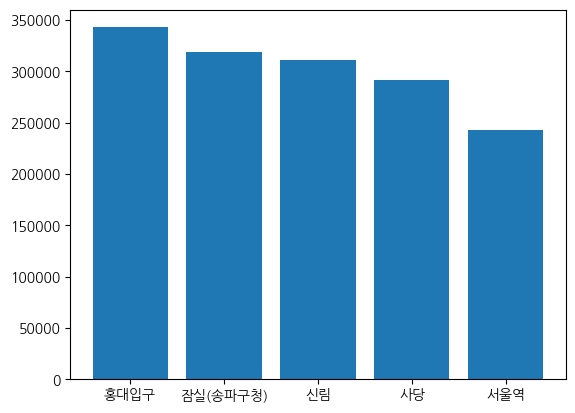

In [131]:
sList = []
nList = []
for i in result[:5]:
    sList.append(i[0])
    nList.append(i[1])
    print(f"{i[0]} : {i[1]:,}")
plt.bar(sList, nList)
plt.show()